In [1]:
import nsc
from nsc.distributions import CoupledNormal, MultivariateCoupledNormal
import coupled_entropy_functions_mc_int as cef
import exact_coupled_entropy_functions_gaussian as cefg
from univariate_exact_cross_entropy import exact_univariate_coupled_cross_entropy

import numpy as np
from datetime import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt

Importing NSC lib v0.0.3.16.


In [2]:
tempMVN = MultivariateCoupledNormal(loc=[0, 0],
                                    scale=[1, 1],
                                    kappa=0.1)
tempMVN_alt = MultivariateCoupledNormal(loc=[1, 1],
                                        scale=[1, 1],
                                        kappa=0.1)

In [3]:
print(cef.coupled_cross_entropy(tempMVN.prob, tempMVN_alt.prob, tempMVN.sample_n))
print(cef.coupled_entropy(tempMVN.prob, tempMVN.sample_n))
print(cef.coupled_divergence(tempMVN.prob, tempMVN_alt.prob, tempMVN.sample_n))
print(cef.shannon_entropy(tempMVN.prob, tempMVN.sample_n))
print(cef.tsallis_entropy(tempMVN.prob, tempMVN.sample_n, kappa=0.))

(3.8315301706052134, 0.15671204789206944)
(3.0413114332889397, 0.12620701794743946)
0.7902187373162737
(3.0413114332889397, 0.12620701794743946)
3.0413114332889397


In [4]:
print(cefg.coupled_cross_entropy_norm(tempMVN, tempMVN_alt))
print(cefg.coupled_entropy_norm(tempMVN))
print(cefg.coupled_divergence_norm(tempMVN, tempMVN_alt))

(3.8315301706052134, 0.15671204789206944)
(3.0413114332889397, 0.12620701794743944)
0.7902187373162737


# Coupled Entropy Testing

## Custom Integration Function

100%|██████████| 100/100 [00:23<00:00,  4.19it/s]


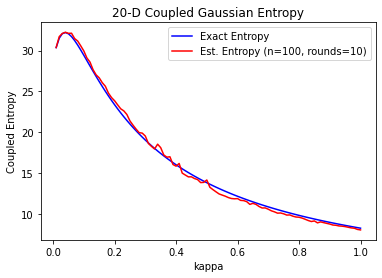

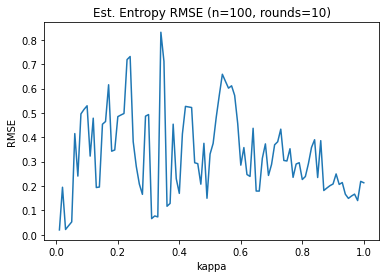

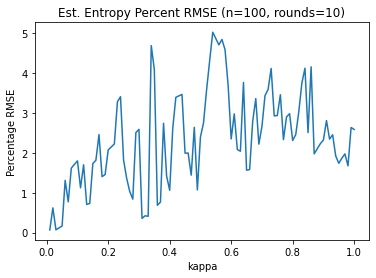

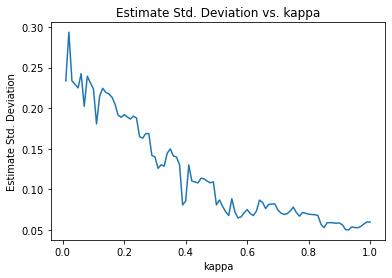

Avg. Run Time: 0.236072 seconds


In [5]:
loc, scale = 0., 1.

sample_size = 100
n_rounds = 10
dim = 20

min_kappa, max_kappa, step_kappa = 0.01, 1, 0.01
kappas = np.arange(min_kappa, max_kappa+step_kappa, step_kappa)
exact_entropies = []
approx_entropies = []
estimate_stddevs = []
mse = []
runtimes = []

for i in tqdm(range(len(kappas))):
    kappa = kappas[i]
    nsc_temp = MultivariateCoupledNormal(loc=np.repeat(loc, dim), 
                                           scale=np.repeat(scale, dim), 
                                           kappa=kappa)

    exact_coupled_entropy = cefg.coupled_normal_entropy(nsc_temp.scale, nsc_temp.kappa)
    exact_entropies.append(exact_coupled_entropy)
    
    start_time = datetime.now()
    approx_coupled_entropy = cef.coupled_entropy(nsc_temp.prob,
                                                 nsc_temp.sample_n,
                                                 kappa=nsc_temp.kappa,
                                                 alpha=nsc_temp.alpha,
                                                 dim=nsc_temp.dim,
                                                 root=False,
                                                 n=sample_size,
                                                 rounds=n_rounds)
    runtimes.append(datetime.now() - start_time)
    approx_entropies.append(approx_coupled_entropy[0])
    estimate_stddevs.append(approx_coupled_entropy[1])
    mse.append((exact_coupled_entropy-approx_coupled_entropy[0])**2)
    
#plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(kappas, exact_entropies, color="blue", label="Exact Entropy")
plt.plot(kappas, approx_entropies, color="red", label=f"Est. Entropy (n={sample_size}, rounds={n_rounds})")
plt.title(f"{dim}-D Coupled Gaussian Entropy")
plt.xlabel("kappa")
plt.ylabel("Coupled Entropy")
plt.legend(loc="upper right")
plt.show()

#plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(kappas, np.sqrt(mse))
plt.xlabel("kappa")
plt.ylabel("RMSE")
plt.title(f"Est. Entropy RMSE (n={sample_size}, rounds={n_rounds})")
plt.show()

#plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(kappas, 100*(np.sqrt(mse)/exact_entropies))
plt.xlabel("kappa")
plt.ylabel("Percentage RMSE")
plt.title(f"Est. Entropy Percent RMSE (n={sample_size}, rounds={n_rounds})")
plt.show()

#plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(kappas, estimate_stddevs)
plt.xlabel("kappa")
plt.ylabel("Estimate Std. Deviation")
plt.title(f"Estimate Std. Deviation vs. kappa")
plt.show()

mean_time = np.mean(runtimes)
mean_seconds = mean_time.seconds + mean_time.microseconds/1000000
print(f"Avg. Run Time: {mean_seconds} seconds")

## Using my Integration Function calculating Coupled Probability Exactly

100%|██████████| 100/100 [00:14<00:00,  6.77it/s]


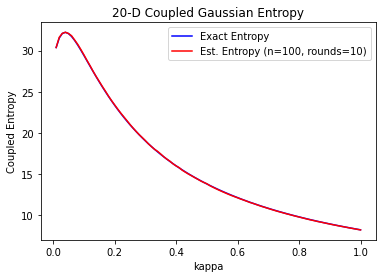

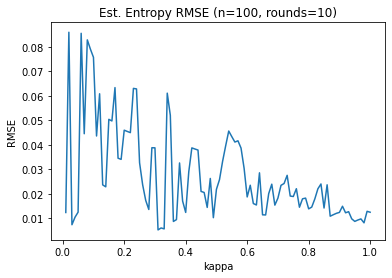

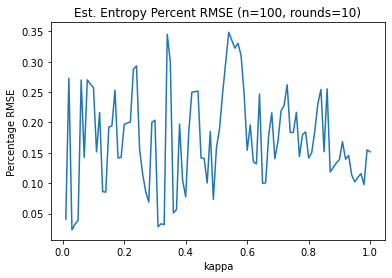

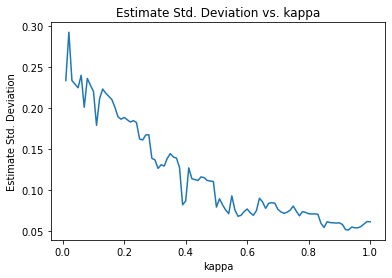

Avg. Run Time: 0.145091 seconds


In [6]:
approx_entropies_norm = []
mse_norm = []
runtimes_norm = []
estimate_stddevs_norm = []

for i in tqdm(range(len(kappas))):
    kappa = kappas[i]
    nsc_temp = MultivariateCoupledNormal(loc=np.repeat(loc, dim), 
                                           scale=np.repeat(scale, dim), 
                                           kappa=kappa)
    
    start_time = datetime.now()
    approx_coupled_entropy_norm = cefg.coupled_entropy_norm(nsc_temp,
                                                            kappa=nsc_temp.kappa,
                                                            root=False,
                                                            n=sample_size,
                                                            rounds=n_rounds)
    runtimes_norm.append(datetime.now() - start_time)
    approx_entropies_norm.append(approx_coupled_entropy_norm[0])
    estimate_stddevs_norm.append(approx_coupled_entropy_norm[1])
    mse_norm.append((exact_entropies[i]-approx_coupled_entropy_norm[0])**2)
    
#plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(kappas, exact_entropies, color="blue", label="Exact Entropy")
plt.plot(kappas, approx_entropies_norm, color="red", label=f"Est. Entropy (n={sample_size}, rounds={n_rounds})")
plt.title(f"{dim}-D Coupled Gaussian Entropy")
plt.xlabel("kappa")
plt.ylabel("Coupled Entropy")
plt.legend(loc="upper right")
plt.show()

#plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(kappas, np.sqrt(mse_norm))
plt.xlabel("kappa")
plt.ylabel("RMSE")
plt.title(f"Est. Entropy RMSE (n={sample_size}, rounds={n_rounds})")
plt.show()

#plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(kappas, 100*(np.sqrt(mse_norm)/exact_entropies))
plt.xlabel("kappa")
plt.ylabel("Percentage RMSE")
plt.title(f"Est. Entropy Percent RMSE (n={sample_size}, rounds={n_rounds})")
plt.show()

#plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(kappas, estimate_stddevs_norm)
plt.xlabel("kappa")
plt.ylabel("Estimate Std. Deviation")
plt.title(f"Estimate Std. Deviation vs. kappa")
plt.show()

mean_time_norm = np.mean(runtimes_norm)
mean_seconds_norm = mean_time_norm.seconds + mean_time_norm.microseconds/1000000
print(f"Avg. Run Time: {mean_seconds_norm} seconds")

# Coupled Cross-Entropy Testing

100%|██████████| 51/51 [00:05<00:00,  9.30it/s]


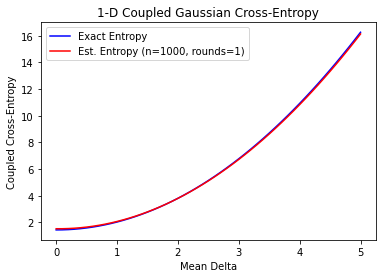

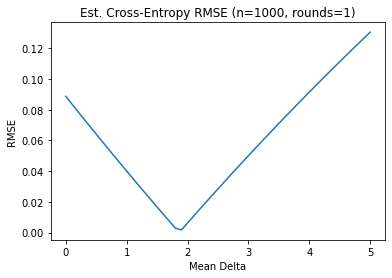

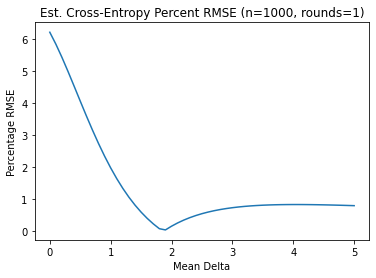

Avg. Run Time: 0.105556 seconds


In [7]:
loc_1, scale_1 = 0., 1.

sample_size = 1000
n_rounds = 1
dim = 1

kappa = 0.1

exact_cross_entropies = []
approx_cross_entropies = []
mse = []
runtimes = []

step = 0.1
mean_deltas = np.arange(0., 5.+step, step)

for i in tqdm(range(len(mean_deltas))):
    
    temp_delta = mean_deltas[i]

    nsc_temp_1 = MultivariateCoupledNormal(loc=np.repeat(loc_1, dim), 
                                           scale=np.repeat(scale_1, dim), 
                                           kappa=kappa)
    
    nsc_temp_2 = MultivariateCoupledNormal(loc=np.repeat(loc_1+temp_delta, dim), 
                                           scale=np.repeat(scale_1, dim), 
                                           kappa=kappa)

    exact_coupled_crossentropy = exact_univariate_coupled_cross_entropy(nsc_temp_1,
                                                                        nsc_temp_2,
                                                                        kappa=kappa)
    exact_cross_entropies.append(exact_coupled_crossentropy)
    
    start_time = datetime.now()
    approx_coupled_crossentropy = cefg.coupled_cross_entropy_norm(nsc_temp_1,
                                                                  nsc_temp_2,
                                                                  kappa=kappa,
                                                                  n=sample_size,
                                                                  rounds=n_rounds)[0]
    runtimes.append(datetime.now() - start_time)
    approx_cross_entropies.append(approx_coupled_crossentropy)
    
    mse.append((exact_coupled_crossentropy-approx_coupled_crossentropy)**2)
    
#plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(mean_deltas, exact_cross_entropies, color="blue", label="Exact Entropy")
plt.plot(mean_deltas, approx_cross_entropies, color="red", label=f"Est. Entropy (n={sample_size}, rounds={n_rounds})")
plt.title(f"{dim}-D Coupled Gaussian Cross-Entropy")
plt.xlabel("Mean Delta")
plt.ylabel("Coupled Cross-Entropy")
plt.legend(loc="best")
plt.show()

#plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(mean_deltas, np.sqrt(mse))
plt.xlabel("Mean Delta")
plt.ylabel("RMSE")
plt.title(f"Est. Cross-Entropy RMSE (n={sample_size}, rounds={n_rounds})")
plt.show()

#plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(mean_deltas, 100*(np.sqrt(mse)/exact_cross_entropies))
plt.xlabel("Mean Delta")
plt.ylabel("Percentage RMSE")
plt.title(f"Est. Cross-Entropy Percent RMSE (n={sample_size}, rounds={n_rounds})")
plt.show()

mean_time = np.mean(runtimes)
mean_seconds = mean_time.seconds + mean_time.microseconds/1000000
print(f"Avg. Run Time: {mean_seconds} seconds")

100%|██████████| 6/6 [00:00<00:00,  8.92it/s]


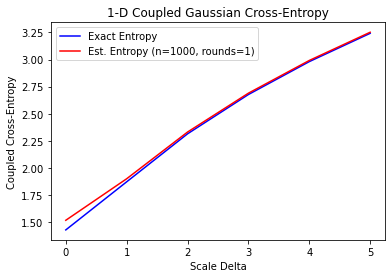

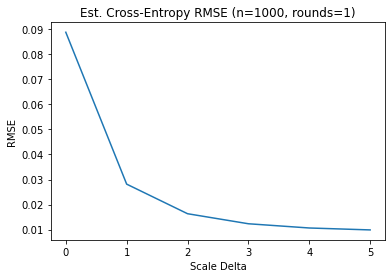

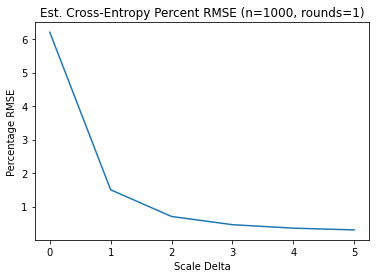

Avg. Run Time: 0.109874 seconds


In [8]:
loc_1, scale_1 = 0., 1.

sample_size = 1000
n_rounds = 1
dim = 1

kappa = 0.1

exact_cross_entropies = []
approx_cross_entropies = []
mse = []
runtimes = []

step = 1.
scale_deltas = np.arange(0., 5.+step, step)

for i in tqdm(range(len(scale_deltas))):
    
    alt_scale = scale_1 + scale_deltas[i]

    nsc_temp_1 = MultivariateCoupledNormal(loc=np.repeat(loc_1, dim), 
                                           scale=np.repeat(scale_1, dim), 
                                           kappa=kappa)
    
    nsc_temp_2 = MultivariateCoupledNormal(loc=np.repeat(loc_1, dim), 
                                           scale=np.repeat(alt_scale, dim), 
                                           kappa=kappa)

    exact_coupled_crossentropy = exact_univariate_coupled_cross_entropy(nsc_temp_1,
                                                                        nsc_temp_2,
                                                                        kappa=kappa)
    exact_cross_entropies.append(exact_coupled_crossentropy)
    
    start_time = datetime.now()
    approx_coupled_crossentropy = cefg.coupled_cross_entropy_norm(nsc_temp_1,
                                                                  nsc_temp_2,
                                                                  kappa=kappa,
                                                                  n=sample_size,
                                                                  rounds=n_rounds)[0]
    runtimes.append(datetime.now() - start_time)
    approx_cross_entropies.append(approx_coupled_crossentropy)
    
    mse.append((exact_coupled_crossentropy-approx_coupled_crossentropy)**2)
    
#plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(scale_deltas, exact_cross_entropies, color="blue", label="Exact Entropy")
plt.plot(scale_deltas, approx_cross_entropies, color="red", label=f"Est. Entropy (n={sample_size}, rounds={n_rounds})")
plt.title(f"{dim}-D Coupled Gaussian Cross-Entropy")
plt.xlabel("Scale Delta")
plt.ylabel("Coupled Cross-Entropy")
plt.legend(loc="best")
plt.show()

#plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(scale_deltas, np.sqrt(mse))
plt.xlabel("Scale Delta")
plt.ylabel("RMSE")
plt.title(f"Est. Cross-Entropy RMSE (n={sample_size}, rounds={n_rounds})")
plt.show()

#plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(scale_deltas, 100*(np.sqrt(mse)/exact_cross_entropies))
plt.xlabel("Scale Delta")
plt.ylabel("Percentage RMSE")
plt.title(f"Est. Cross-Entropy Percent RMSE (n={sample_size}, rounds={n_rounds})")
plt.show()

mean_time = np.mean(runtimes)
mean_seconds = mean_time.seconds + mean_time.microseconds/1000000
print(f"Avg. Run Time: {mean_seconds} seconds")

In [9]:
from mpl_toolkits import mplot3d

sample_size = 1000
n_rounds = 1

loc_1, scale_1 = 0., 1.
kappa = 0.1

step = 0.25
mean_deltas = np.arange(0., 5.+step, step)
scale_deltas = np.arange(0., 5.+step, step)

param_deltas = []

for i in mean_deltas:
    for j in scale_deltas:
        param_deltas.append([i, j])
        
exact_cross_entropies = []
approx_cross_entropies = []

for i in tqdm(range(len(param_deltas))):
    
    param_delta = param_deltas[i]
    
    nsc_temp_1 = MultivariateCoupledNormal(loc=np.repeat(loc_1, dim), 
                                           scale=np.repeat(scale_1, dim), 
                                           kappa=kappa)
    
    nsc_temp_2 = MultivariateCoupledNormal(loc=np.repeat(loc_1+param_delta[0], dim), 
                                           scale=np.repeat(scale_1+param_delta[1], dim), 
                                           kappa=kappa)

    exact_coupled_crossentropy = exact_univariate_coupled_cross_entropy(nsc_temp_1,
                                                                        nsc_temp_2,
                                                                        kappa=kappa)
    exact_cross_entropies.append(exact_coupled_crossentropy)
    
    approx_coupled_crossentropy = cefg.coupled_cross_entropy_norm(nsc_temp_1,
                                                                  nsc_temp_2,
                                                                  kappa=kappa,
                                                                  n=sample_size,
                                                                  rounds=n_rounds)[0]
    
    approx_cross_entropies.append(approx_coupled_crossentropy)

100%|██████████| 441/441 [00:47<00:00,  9.32it/s]


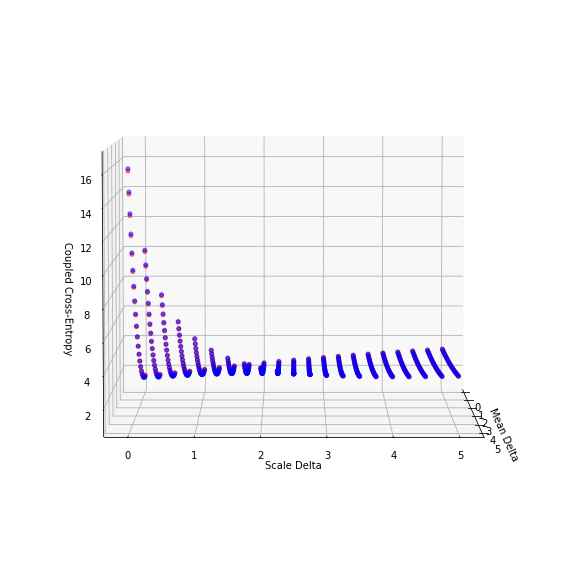

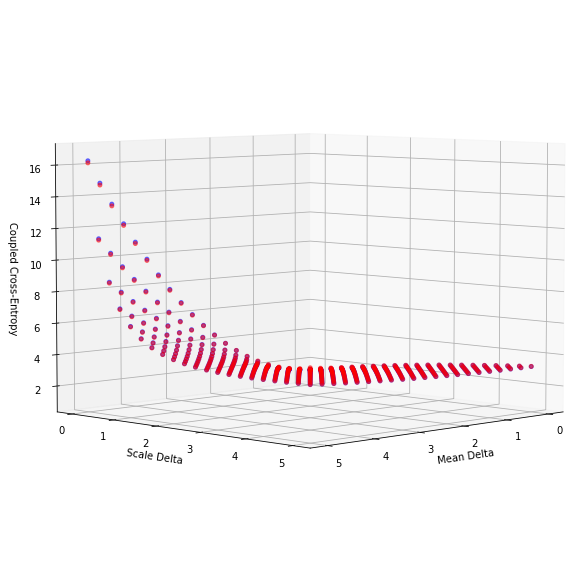

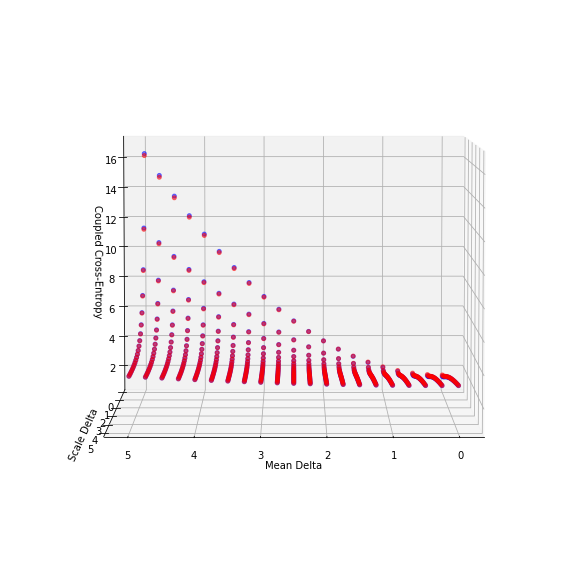

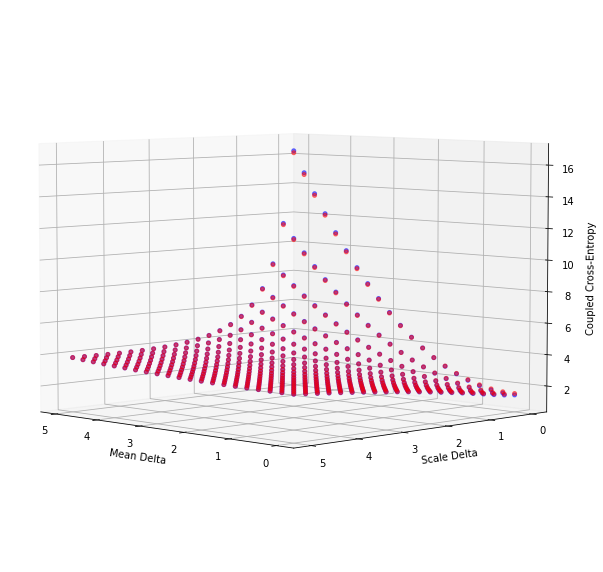

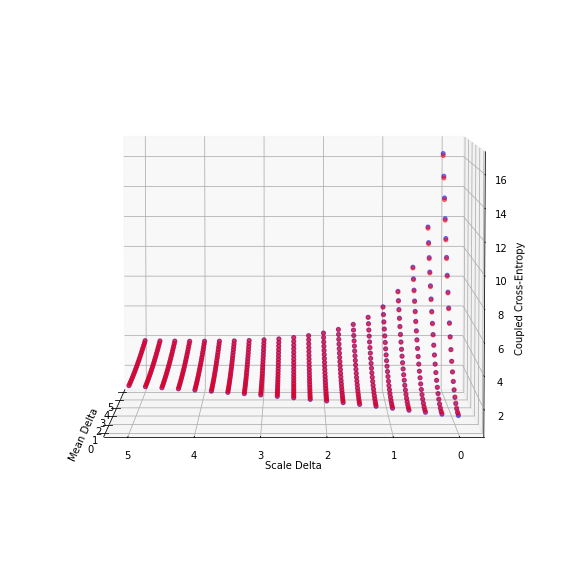

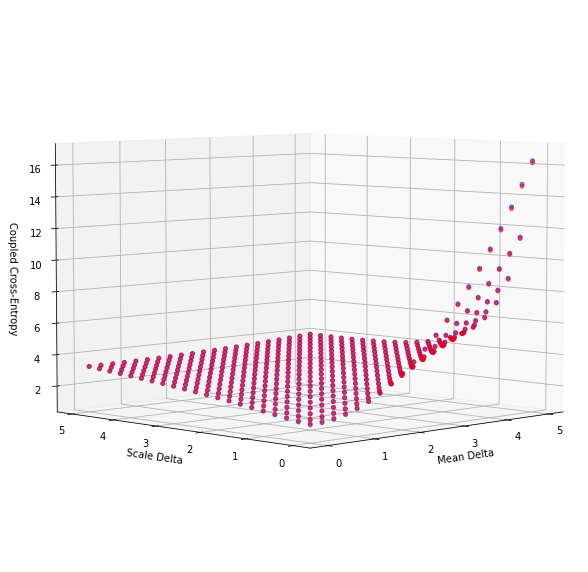

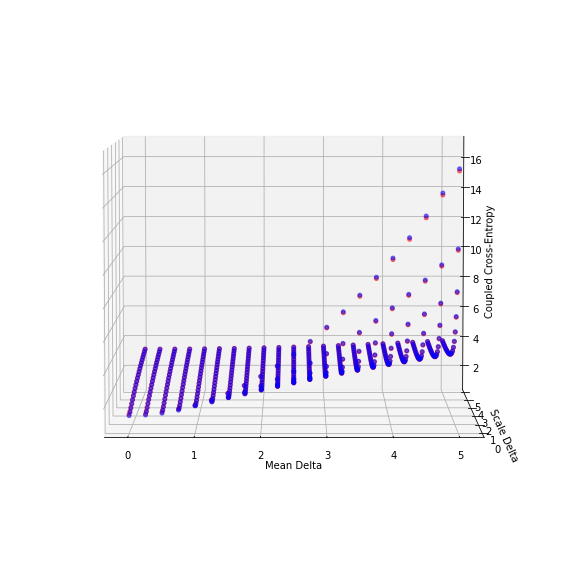

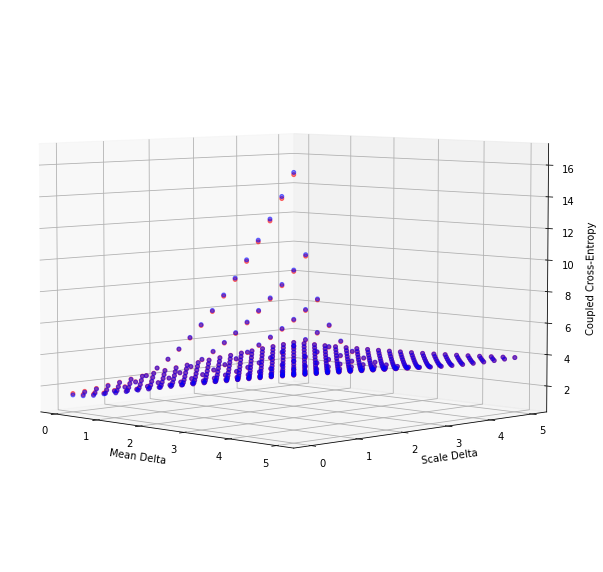

In [10]:
x, y = np.array(param_deltas)[:,0], np.array(param_deltas)[:,1]

for ii in range(0,360,45):
    plt.figure(figsize=(10, 20))
    ax = plt.axes(projection='3d')
    
    ax.scatter3D(x, y, exact_cross_entropies, color="blue", s=16, alpha=0.5)
    ax.scatter3D(x, y, approx_cross_entropies, color="red", s=16, alpha=0.5)
    ax.set_xlabel("Mean Delta")
    ax.set_ylabel("Scale Delta")
    ax.set_zlabel("Coupled Cross-Entropy")
    ax.view_init(elev=5., azim=ii)
    plt.show()